In [1]:
import cv2

In [2]:
haar_data = cv2.CascadeClassifier('data.xml')

In [6]:
capture = cv2.VideoCapture(0)
data = []
while True :
    flag, img = capture.read()
    if flag :
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces :
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, : ]
            face = cv2.resize(face, (50,50))
            print(len(data))
            if len(data) < 400 :
                data.append(face)
    cv2.imshow('result',img)
    if cv2.waitKey(2) == 27 or len(data) >= 150 :
        break
        
capture.release()        
cv2.destroyAllWindows()   

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [4]:
import numpy as np

In [5]:
np.save('without_mask.npy',data)

In [7]:
np.save('with_mask.npy',data)

In [8]:
import matplotlib.pyplot as plt

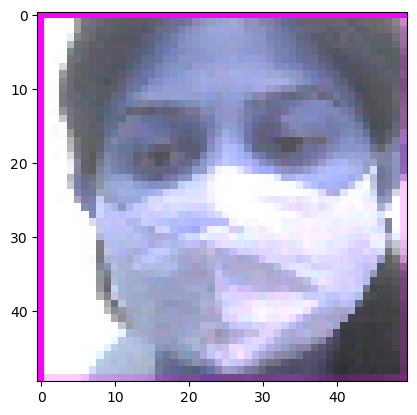

In [9]:
plt.imshow(data[0])

In [10]:
with_mask = np.load('with_mask.npy')
without_mask = np.load('without_mask.npy')

In [11]:
with_mask.shape

(150, 50, 50, 3)

In [12]:
without_mask.shape

(150, 50, 50, 3)

In [14]:
with_mask = with_mask.reshape(150, 50 * 50 * 3)
without_mask = without_mask.reshape(150, 50 * 50 * 3)

In [15]:
with_mask.shape

(150, 7500)

In [16]:
without_mask.shape

(150, 7500)

In [17]:
x = np.r_[with_mask, without_mask]

In [18]:
x.shape

(300, 7500)

In [19]:
labels = np.zeros(x.shape[0])

In [20]:
labels[150: ] = 1.0

In [21]:
names = {0 : 'Mask', 1 : 'No Mask'}

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size = 0.25)

In [25]:
x_train.shape

(225, 7500)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components = 3)
x_train = pca.fit_transform(x_train)

In [28]:
x_train[0]

array([-1871.41963365,   938.29011563,   283.3424935 ])

In [29]:
x_train.shape

(225, 3)

In [30]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [31]:
x_test = pca.transform(x_test)
y_pred = svm.predict(x_test)

In [34]:
accuracy_score(y_test, y_pred)

1.0

In [35]:
haar_data = cv2.CascadeClassifier('data.xml')
capture = cv2.VideoCapture(0)
data = []
font = cv2.FONT_HERSHEY_DUPLEX
while True :
    flag, img = capture.read()
    if flag :
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces :
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, : ]
            face = cv2.resize(face, (50,50))
            face = face.reshape(1, -1)
            face = pca.transform(face)
            pred = svm.predict(face)[0]
            n = names[int(pred)]
            cv2.putText(img, n, (x,y), font, 1, (240,243,244), 2)
            print(n)
    cv2.imshow('result',img)
    if cv2.waitKey(2) == 27 :
        break
        
capture.release()        
cv2.destroyAllWindows()  

No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
